In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Installing the required packages**

In [ ]:

import torch
import os
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor,Lambda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# **Downloading DataSet**

In [ ]:
training_data=datasets.FashionMNIST(root='/content/drive/My Drive/data',train=True,download=True,transform=ToTensor())
test_data=datasets.FashionMNIST(root='/content/drive/My Drive/data',train=False,download=True,transform=ToTensor())

In [ ]:
train_set,val_set = torch.utils.data.random_split(training_data, [50000,10000])


In [ ]:
data_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True)


# **iterator for test ,train and validation set**

In [ ]:
train_dataloader=torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_dataloader=torch.utils.data.DataLoader(val_set, batch_size=128)
test_dataloader=torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)



[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

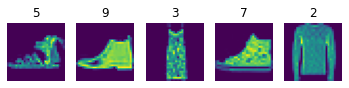

In [ ]:
b=next(iter(test_dataloader))
print(b)
sample=b[0][:5]
label=b[1]
for i,s in enumerate(sample):
  plt.subplot(1,5,i+1)
  plt.title(int(label[i]))
  plt.imshow(s.numpy().reshape(28,28))
  plt.axis('off')



# **Defining CNN class**

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    #input size is 1 and outputsize is 16
    self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
    #input size is 16 and output size is 32
    self.layer2=nn.Sequential(
        nn.Conv2d(16,32,kernel_size=3,padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2))
    #fully connected layer
    self.layer3 = nn.Sequential(
        nn.Linear(7*7*32, 256),
        nn.ReLU(),
        nn.Linear(256,10),
        nn.Softmax())
  def forward(self,x):
    #input is passes to the first CNN layer
    o1 = self.layer1(x)
    #output of first layer is passed to next CNN layer
    o2= self.layer2(o1)
    
    
    o2 = o2.view(o2.size(0), -1)
    #flattened output is passed to the fullyconnected layer
    y=self.layer3(o2)

    return y
    

Optimal hyperparameter for training


In [ ]:
dataiter = iter(train_dataloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
loss_fn = nn.CrossEntropyLoss()

# **Function for training**

In [ ]:
def train_loop(dataloader,model,loss_fn,opt):
  size=len(dataloader.dataset)
  # print(size)
  
  l=0
  for i,(img,label) in enumerate(dataloader):
    pred=model(img) #predicting the output
    loss=loss_fn(pred,label) #finding the loss
    l=l+loss.item()
    opt.zero_grad()
    loss.backward()#backward propagation
    opt.step()#gradient descent. The optimizer iterates over all parameters (tensors) to be updated and their internally stored gradients are used
  print("training loss:",(l/size))
  return (l/size)


# **Function for testing**

In [ ]:
def test_loop(dataloader,model,loss_fn):
  size=len(dataloader.dataset)
  test_loss=0
  correct=0
  with torch.no_grad():
    for (img,label) in dataloader:
      pred=model(img)#predicting the output
      test_loss=test_loss+loss_fn(pred,label).item()
      correct+=(pred.argmax(1)==label).type(torch.float).sum().item()#finding the correct prediction
  
  test_loss/=size
  correct/=size
  print("accuracy:",correct*100,"error:",test_loss)#accuracy
  return test_loss
  
  

# **Hyper paramter tuning**

In [ ]:
Learning_rate=[0.001,0.005,0.01]
batchsize=[64,128,256]

In [ ]:
for i in range(len(Learning_rate)):
  for j in range(len(batchsize)):
    model=CNN()
    train_dataloader=torch.utils.data.DataLoader(train_set, batch_size=batchsize[j], shuffle=True)
    opt = torch.optim.Adam(model.parameters(), lr=Learning_rate[i])
    print("")
    print("-----------------------------------------------------")
    print("")
    print("hyper parameter: lr rate:",Learning_rate[i],"  batchsize:",batchsize[j])
    epochs=3
    for epoch in range(epochs):
      print(epoch,"--------")
      l1=train_loop(train_dataloader,model,loss_fn,opt)
      print("validation accuracy and error: ")
      l2=test_loop(val_dataloader,model,loss_fn)

    





-----------------------------------------------------

hyper parameter: lr rate: 0.001   batchsize: 64
0 --------


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


training loss: 0.025776991255283356
validation accuracy and error: 
accuracy: 85.68 error: 0.01269134714603424
1 --------
training loss: 0.024895868351459502
validation accuracy and error: 
accuracy: 87.56 error: 0.012526008069515229
2 --------
training loss: 0.024660147285461426
validation accuracy and error: 
accuracy: 88.17 error: 0.012473774647712708

-----------------------------------------------------

hyper parameter: lr rate: 0.001   batchsize: 128
0 --------
training loss: 0.012860861604213715
validation accuracy and error: 
accuracy: 84.02 error: 0.012829672634601594
1 --------
training loss: 0.012423514623641968
validation accuracy and error: 
accuracy: 88.28 error: 0.012479946911334992
2 --------
training loss: 0.012322309629917145
validation accuracy and error: 
accuracy: 87.29 error: 0.012548222160339356

-----------------------------------------------------

hyper parameter: lr rate: 0.001   batchsize: 256
0 --------
training loss: 0.006493447160720825
validation accura

# **optimal hyperparamter**

In [ ]:
#the set which gives best accuracy and loss on validation data
learning_rate=1e-3
batch_size=64
model=CNN()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_dataloader=torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# **Training our Final Model**

In [ ]:
path = "/content/drive/My Drive/data/final_phase.pth"
path5 = "/content/drive/My Drive/data/epoch5.pth"
path10 = "/content/drive/My Drive/data/epoch10.pth"
path15 = "/content/drive/My Drive/data/epoch15.pth"
path20 = "/content/drive/My Drive/data/epoch20.pth"
path25 = "/content/drive/My Drive/data/epoch25.pth"
path30 = "/content/drive/My Drive/data/epoch30.pth"
path35 = "/content/drive/My Drive/data/epoch35.pth"

The model is stored after every 5 epochs and then prediction on validation set is generated from these models

In [ ]:
epochs=35
train_loss=[]
val_loss=[]
for epoch in range(epochs):
  print(epoch+1,"--------")
  l1=train_loop(train_dataloader,model,loss_fn,opt)
  print("validation accuracy and error: ")
  l2=test_loop(val_dataloader,model,loss_fn)
  train_loss.append(l1)
  val_loss.append(l2)
  if(epoch+1==5): # saving the model after every 5 epochs 
    torch.save(model,path5)
  elif(epoch+1==10):
    torch.save(model,path10)
  elif(epoch+1==15):
    torch.save(model,path15)
  elif(epoch+1==20): # saving the model after every 5 epochs 
    torch.save(model,path20)
  elif(epoch+1==25):
    torch.save(model,path25)
  elif(epoch+1==30):
    torch.save(model,path30)
  elif(epoch+1==35):
    torch.save(model,path35)

1 --------


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


training loss: 0.025630031700134278
validation accuracy and error: 
accuracy: 84.16 error: 0.012792121720314025
2 --------
training loss: 0.024934381256103515
validation accuracy and error: 
accuracy: 86.79 error: 0.012580195307731629
3 --------
training loss: 0.024668907330036162
validation accuracy and error: 
accuracy: 87.91 error: 0.01250328050851822
4 --------
training loss: 0.02459973352909088
validation accuracy and error: 
accuracy: 87.87 error: 0.012492941653728485
5 --------
training loss: 0.02448432156562805
validation accuracy and error: 
accuracy: 88.29 error: 0.012466426050662994
6 --------
training loss: 0.024379005300998687
validation accuracy and error: 
accuracy: 89.22 error: 0.012392047011852264
7 --------
training loss: 0.02431631690979004
validation accuracy and error: 
accuracy: 90.06 error: 0.012325125336647034
8 --------
training loss: 0.024235964863300322
validation accuracy and error: 
accuracy: 88.59 error: 0.012442660582065583
9 --------
training loss: 0.024

In [ ]:
#daving final model
torch.save(model,path)

# **loss vs iteration graph**

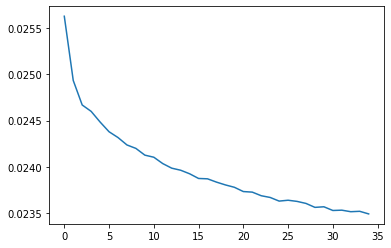

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),train_loss)

# **testing the model**

In [ ]:
#LOADING THE MODEL
model=torch.load("/content/drive/My Drive/data/final_phase.pth")

In [ ]:
#train accuracy
print("train_accuracy ::")
test_loop(train_dataloader,model,loss_fn)

train_accuracy ::


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


accuracy: 96.344 error: 0.023431158764362334


0.023431158764362334

In [ ]:
 #test accuracy
 print("test_accuracy ::")
 test_loop(test_dataloader,model,loss_fn)

test_accuracy ::


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


accuracy: 91.29 error: 0.024306100964546204


0.024306100964546204

In [ ]:
model.eval()

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=1568, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=10, bias=True)
    (3): Softmax(dim=None)
  )
)

# **Confusion Matrix**

In [ ]:
P=[]
labels=[]
with torch.no_grad():
    for (img,label) in test_dataloader:
      pred=model(img)
      P=P+(pred.argmax(1).tolist())
      labels=labels+label.tolist()
print(len(P))
print(len(labels))
     

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


10000
10000


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=P,y_pred=labels)
print(confusion)


[[896   1  27  17   1   0 106   0   2   1]
 [  0 979   1   4   1   0   1   0   0   0]
 [  9   0 839   7  40   0  56   0   3   0]
 [ 12  15   9 901  18   0  30   0  11   0]
 [  3   1  64  34 907   0  66   0   3   0]
 [  1   0   0   0   0 975   0   8   1   6]
 [ 72   2  60  37  32   0 736   0   4   0]
 [  1   0   0   0   0  13   0 946   2  18]
 [  5   2   0   0   1   1   5   2 974   2]
 [  1   0   0   0   0  11   0  44   0 973]]


# **Saving the results in a file**

In [ ]:
map={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}


In [ ]:
f=open("/content/drive/My Drive/data/CNN.txt",'w')
for i in P:
  f.write(map[i])
  f.write('\n')
f.close()

In [ ]:
f=open("/content/drive/My Drive/data/CNN.txt")
for row in f:
  print(row)

Streaming output truncated to the last 5000 lines.
Trouser

Bag

T-shirt/top

Bag

Coat

Coat

Shirt

Sandal

Sneaker

Sandal

Pullover

Bag

Sneaker

Coat

Trouser

Sandal

Shirt

Ankle boot

Shirt

Shirt

Sneaker

Sneaker

T-shirt/top

Pullover

Ankle boot

T-shirt/top

Pullover

Coat

Trouser

Coat

Pullover

Pullover

Sandal

Ankle boot

T-shirt/top

Sandal

Shirt

Sneaker

Dress

Trouser

Bag

Shirt

Coat

Trouser

T-shirt/top

Shirt

T-shirt/top

Ankle boot

Dress

Bag

Bag

Bag

Trouser

Sneaker

Shirt

Ankle boot

Shirt

Ankle boot

Dress

Trouser

Dress

Trouser

Sandal

Coat

Dress

Ankle boot

Trouser

Pullover

Ankle boot

Bag

Trouser

Sandal

T-shirt/top

Sandal

Dress

Shirt

Shirt

Coat

Dress

Dress

Sneaker

Sandal

Bag

Trouser

Coat

Shirt

Sneaker

Coat

Dress

Dress

Dress

Pullover

Trouser

Sneaker

Dress

Trouser

Dress

Ankle boot

T-shirt/top

Ankle boot

Sandal

Bag

Sneaker

Sandal

T-shirt/top

Trouser

Sandal

Shirt

T-shirt/top

Shirt

Coat

Bag

Ankle b